# imports

In [3]:
from itertools import count
from math import ceil, floor
import cv2
import os
import mediapipe as mp 
import shutil
import datetime
import time #to calculate frame per second 
import numpy as np

# Both hands

In [4]:
const_inf = 100

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def med_detect(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

def draw_lms(img, results):
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    return img

def extract_key_points(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return np.concatenate([lh,rh]) 

def extract_key_points_left(result):
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.full(63,const_inf)

    
    return lh

def extract_key_points_right(result):
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.full(63,const_inf)
    
    return rh


def angle_between_vectors(u, v):
        """
        Args
            u, v: 3D vectors representing two connections
        Return
            Angle between the two vectors
        """
        if np.array_equal(u, v):
            return 0
        dot_product = np.dot(u, v)
        norm = np.linalg.norm(u) * np.linalg.norm(v)
        return np.arccos(dot_product / norm)



path = "C:/Users/Raiyan/Desktop/refined"

out_path = "C:/Users/Raiyan/Desktop/lfr"

point_out = "C:/Users/Raiyan/Desktop/lpd"

dir_list = os.listdir(path)

# print(dir_list)

for fol in dir_list:
    # print(fol)
    tem_path = path+"/"+fol
    tem_dir = os.listdir(tem_path)
    # print(tem_dir)
    for vid in tem_dir:
        # print(vid)
        vid_name = vid.split('.')
        child_folder = vid_name[0]
        # print(child_folder)
        
        out_folder = os.path.join(out_path,child_folder)
        
        point_out_folder = os.path.join(point_out,child_folder)
        
        # print(out_folder)
        
        if os.path.exists(out_folder):
            shutil.rmtree(out_folder)
            
        if os.path.exists(point_out_folder):
            shutil.rmtree(point_out_folder)
            
        os.mkdir(point_out_folder)
        
        os.mkdir(out_folder)
        
        vid_path = path+"/"+fol+"/"+vid
        
        # print(vid_path)
        
        cap = cv2.VideoCapture(vid_path)
        
        mpHands = mp.solutions.hands
        hands = mpHands.Hands()
        mpDraw = mp.solutions.drawing_utils
        
        prevTime = 0
        currTime = 0
        
        with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:
            sequence = 0
            long_seq = 1000
            while (cap.isOpened()):
                
                # if cap.isOpened() == False : 
                #     break
                
                ret,frame = cap.read()
                
                if ret:
                
                    img, results = med_detect(frame,holistic)
                    
                    img = draw_lms(img,results)
                    
                    ts = (datetime.datetime.now())
                    
                    ts = str(ts.timestamp())
                    
                    keypoints = extract_key_points(results)
                    
                    l_k = extract_key_points_left(results)
                    
                    r_k = extract_key_points_right(results)
                    
#                     print(len(l_k))
                    
                    ar_l = []
                    
                    p_i = 0
                    
                    while p_i<61:
                        ux = l_k[p_i]
                        uy = l_k[p_i+1]
                        uz = l_k[p_i+2]
                        p_i+=3
                        ar_l.append((ux,uy,uz))
#                         print(p_i)
#                         print("done")
                        
#                     print("done")
                    
#                     print(len(ar_l))
        
#                     print(p_i)

#                     for elm in ar_l:
#                         print(elm)
            
                    
                    ar_r = []
                    
                    p_i = 0
                    
                    while p_i<61:
                        ux = r_k[p_i]
                        uy = r_k[p_i+1]
                        uz = r_k[p_i+2]
                        p_i+=3
                        ar_r.append((ux,uy,uz))
                        
#                     print(len(ar_r))
                    
                        
                    
                    angles_l=[]
                    angles_r=[]
                    angles_list = []
                    
                    for i in range (0,20):
                        connection_from1 = ar_l[i]
                        connection_from2 = ar_r[i]
                        for j in range(i+1,21):
                            connection_to1 = ar_l[j]
                            connection_to2 = ar_r[j]
                            angle1 = angle_between_vectors(connection_from1, connection_to1)
                            # If the angle is not NaN we store it else we store 0
                            if angle1 == angle1:
                                angles_list.append(angle1)
                            else:
                                angles_list.append(0)
#                             print("done")
                            
                            angle2 = angle_between_vectors(connection_from2, connection_to2)
                            # If the angle is not NaN we store it else we store 0
                            if angle2 == angle2:
                                angles_list.append(angle2)
                            else:
                                angles_list.append(0)
#                             print("done")
                    
                    
#                     for i in range (0,20):
#                         connection_from = ar_r[i]
#                         for j in range(i+1,21):
#                             connection_to = ar_r[j]
#                             angle = angle_between_vectors(connection_from, connection_to)
#                             # If the angle is not NaN we store it else we store 0
#                             if angle == angle:
#                                 angles_r.append(angle)
#                             else:
#                                 angles_r.append(0)
# #                             print("done")
                    
                    
#                     angles_list = []
                    
#                     angles_list.append(angles_l)
                    
#                     angles_list.append(angles_r)
                    
#                     print("done")
                    
#                     print(len(angles_l))

#                     print(len(angles_list))
                    
                    
                    if(len(keypoints)==126):
                    
                        # if sequence == 0:
                        #     print(keypoints)

                        np.save(os.path.join(point_out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),angles_list)

                        # sequence = sequence+1
                        # long_seq = long_seq+1

                        sq = str(sequence)

                        cv2. imwrite(os. path. join(out_folder
                                                    , child_folder+'_'+str(long_seq)+"_"+ts+sq+'.jpg'), img)

                        # cv2.imshow('Hand Gestures',img)

                        sequence = sequence+1
                        long_seq = long_seq+1
                    
                    if cv2.waitKey(1)==13 : 
                        break
                
                else:
                    break
            cap.release()
            cv2.destroyAllWindows()
        

In [ ]:
print("Done")

# Interpolation


In [11]:
# const_inf = 100000000000000

# path = "F:/Online Class/4th year thesis/datasets/Sign language/point data"
# out_path = "F:/Online Class/4th year thesis/datasets/Sign language/interpolated"

# dir_list = os.listdir(path)

# print(dir_list)

# for fol in dir_list:
#     # print(fol)
#     child_folder = fol
#     out_folder = os.path.join(out_path,child_folder)
#     tem_path = path+"/"+fol
#     tem_dir = os.listdir(tem_path)
#     if os.path.exists(out_folder):
#         shutil.rmtree(out_folder)
#     os.mkdir(out_folder)
#     # print(tem_dir)
#     id = 0
#     lst=[]
#     for pnt in tem_dir:
#         # print(pnt)
#         # if pnt == 'shundor_1_1664389748.840814_14.npy':
#         tf=1
#         pnt_str = str(tem_path)
#         point_data_path = pnt_str+"/"+pnt
#         # print(point_data_path)
#         data=np.load(point_data_path)
#         # print("Data start")
#         # print(len(data))
#         # print(data[0])
#         # print(data)
#         # print("Data end")
#         for dt in data:
#             # print("St")
#             # print(dt)
#             # print("End")
#             if dt == const_inf:
#                 # print(dt)
#                 tf=0
#         if tf==1:
#             lst.append(id)
#         id=id+1
#     # print(fol)
#     # print(lst)
#     sequence = 0
#     long_seq=1000
#     expected_sq = 0
#     msd_lst = []
#     for pnt in tem_dir:
#         # print(pnt)
#         # if pnt == 'shundor_1_1664389748.840814_14.npy':
#         tf=1
#         pnt_str = str(tem_path)
#         point_data_path = pnt_str+"/"+pnt
#         # print(point_data_path)
#         data=np.load(point_data_path)
#         # print("Data start")
#         # print(len(data))
#         # print(data[0])
#         # print(data)
#         # print("Data end"
        
#         ext = 0
        
#         for item in lst:
#             if item==expected_sq:
#                 ext=1
        
#         ts = (datetime.datetime.now())
                    
#         ts = str(ts.timestamp())
        
#         if ext==1:
        
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
            
#         if ext == 0:
#             msd_lst.append(expected_sq)
#             prev = -1
#             nxt = -1
#             x = len(lst)
#             for i in range(0,x-1):
#                 if expected_sq > lst[i] and expected_sq < lst[i+1]:
#                     prev = lst[i]
#                     nxt = lst[i+1]
#             # if nxt!=prev:
#             factor = (expected_sq-prev) / (nxt-prev)
            
#             pr_ar = np.full(126,const_inf)
            
#             nx_ar = np.full(126,const_inf)
            
#             for ld in tem_dir:
#                 # print(ld)
                
#                 splt_txt = ld.split("_")
                
#                 # print(splt_txt)
                
                
#                 # if pnt == 'shundor_1_1664389748.840814_14.npy':
#                 ld_str = str(tem_path)
#                 # print("EIJE")
#                 point_data_path_2 = ld_str+"/"+ld
#                 # print(point_data_path_2)
            
#                 data=np.load(point_data_path_2)
                
#                 # print("Start")
#                 # print(data[0])
#                 # print("End")
                
#                 # print(data)
                
#                 final_split = splt_txt[4].split(".")
                
#                 # print(type(final_split[0]))
                
#                 num = int(final_split[0])
                
#                 if num == prev:
#                     # print(prev)
#                     pr_ar = data
#                 if num == nxt:
#                     nx_ar = data
#                     # print(nxt)
                    
#             cur_ar = data
            
            
            
#             for i in range(0,126):
                
#                 cur_ar[i] = factor*(nx_ar[i]-pr_ar[i])
#                 # print(factor*(nx_ar[i]-pr_ar[i]))
#             data = cur_ar
            
#             # print("Start")
#             # print(cur_ar[0])
#             # print("End")
#             # print(cur_ar)
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),cur_ar)
            
            
#             # print("Expexted: ", expected_sq)
#             # print("Pre ",prev,' ','next ', nxt)
            
            
        
#         # print(msd_lst)
        
#         long_seq = long_seq+1
        
#         sequence = sequence+1
        
#         expected_sq = expected_sq+1

In [ ]:
print("Done")

# Fixed


In [ ]:
# const_inf = 100000000000000

# path = "F:/Online Class/4th year thesis/datasets/Sign language/interpolated"
# out_path = "F:/Online Class/4th year thesis/datasets/Sign language/fixed"

# dir_list = os.listdir(path)

# print(dir_list)



# for fol in dir_list:
#     # print(fol)
#     child_folder = fol
#     out_folder = os.path.join(out_path,child_folder)
#     tem_path = path+"/"+fol
#     tem_dir = os.listdir(tem_path)
#     if os.path.exists(out_folder):
#         shutil.rmtree(out_folder)
#     os.mkdir(out_folder)
#     # print(tem_dir)
    
#     count = 0
#     for pnt in tem_dir:
#         count = count+1
#     count = count/50
#     print(count)
    
#     id = count
#     sequence = 0
#     long_seq=1000
#     for iii in range(0,48):
#         # print(tem_dir[0])
        
#         ts = (datetime.datetime.now())
                    
#         ts = str(ts.timestamp())
        
#         if id<=1:
#             # print()
#             point_data_path = tem_path+"/"+tem_dir[0]
#             data=np.load(point_data_path)
#             np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
#             print(data)
            
#         else:
#             flr = floor(id)
#             cl = ceil(id)
            
#             if flr==cl:
            
#                 print("ST")
                
#                 print(flr)
                
#                 print(cl)
                
#                 print("EN")
                
#                 point_data_path = tem_path+"/"+tem_dir[cl]
#                 data=np.load(point_data_path)
#                 np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
#                 print(data)
            
#             else:
#                 factor = (id-flr)/(cl-flr)
                
#                 point_data_path = tem_path+"/"+tem_dir[flr]
#                 data1=np.load(point_data_path)
                
#                 point_data_path = tem_path+"/"+tem_dir[cl]
#                 data2=np.load(point_data_path)
                
#                 data = data1
                
#                 for i in range(0,126):
#                     data[i] = factor*(data2[i]-data1[i])
#                 np.save(os.path.join(out_folder,child_folder+'_'+str(long_seq)+'_'+ts+'_'+str(sequence)),data)
                
#                 print(data)
            
        
        
        
#         sequence = sequence+1
#         long_seq = long_seq+1
#         id=id+count

In [ ]:
print("Done")

# Label and feature

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    axs[0].plot( history.history["categorical_accuracy"], label="train accuracy")
    axs[0].plot( history.history["val_categorical_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    axs[1].plot( history.history["loss"], label="train error")
    axs[1].plot( history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
#     axs[1].set_ylabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
    

In [4]:
actions = np.array(['bad',
                    'best',
                    'glad',
                    'sad',
                    'scared',
                    'stiff',
                    'surprise'
#                     'biscuit',
#                     'goru',
#                     'kalo',
#                     'kharap',
#                     'khata',
#                     'mach',
#                     'mangsho',
#                     'naam',
#                     'pakhi',
#                     'pani', 
#                     'rasta',
#                     'shap',
#                     'sheit'
#                     'shikkhok',
#                     'sundor',
#                     'valo'
                    ])

In [5]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'bad': 0,
 'best': 1,
 'glad': 2,
 'sad': 3,
 'scared': 4,
 'stiff': 5,
 'surprise': 6}

In [14]:
# Thirty videos worth of data
# HOW MANY VIDEO FOR EACH ACTION ?????
no_sequences = 80

# HOW MANY FRAME WE TAKE FOR EACH VIDEO ?????
# Videos are going to be 30 frames in length
sequence_length = 10

# Folder start
# start_folder = 30

DATA_PATH = os.path.join('C:/Users/Raiyan/Desktop/training')
ii = 0
sequences = [] 
labels = []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            
            # res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # res = np.load(os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{sequence_length}.npy'.format(frame_num)))
            # loaded_path = os.path.join( f'/content/drive/MyDrive/thesis/ip_data2/{action}/{str(sequence)}/{frame_num}.npy')

            loaded_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            # print(frame_num)
            # print(loaded_path, frame_num)
            # print( np.array(np.load( loaded_path )).shape ) # gives (126,)
            res = np.load( loaded_path )
            # print(res)
            window.append(res)
            # print( np.array(window).shape )
        print( ii, np.array(window).shape ) if np.array(window).shape == (10,126) else print( ii, 'bhul->', action, sequence, 'e', np.array(window).shape,'ashche')
        # print(sequence)
        ii = ii + 1
        sequences.append(window)
        labels.append(label_map[action])

0 (10, 126)
1 (10, 126)
2 (10, 126)
3 (10, 126)
4 (10, 126)
5 (10, 126)
6 (10, 126)
7 (10, 126)
8 (10, 126)
9 (10, 126)
10 (10, 126)
11 (10, 126)
12 (10, 126)
13 (10, 126)
14 (10, 126)
15 (10, 126)
16 (10, 126)
17 (10, 126)
18 (10, 126)
19 (10, 126)
20 (10, 126)
21 (10, 126)
22 (10, 126)
23 (10, 126)
24 (10, 126)
25 (10, 126)
26 (10, 126)
27 (10, 126)
28 (10, 126)
29 (10, 126)
30 (10, 126)
31 (10, 126)
32 (10, 126)
33 (10, 126)
34 (10, 126)
35 (10, 126)
36 (10, 126)
37 (10, 126)
38 (10, 126)
39 (10, 126)
40 (10, 126)
41 (10, 126)
42 (10, 126)
43 (10, 126)
44 (10, 126)
45 (10, 126)
46 (10, 126)
47 (10, 126)
48 (10, 126)
49 (10, 126)
50 (10, 126)
51 (10, 126)
52 (10, 126)
53 (10, 126)
54 (10, 126)
55 (10, 126)
56 (10, 126)
57 (10, 126)
58 (10, 126)
59 (10, 126)
60 (10, 126)
61 (10, 126)
62 (10, 126)
63 (10, 126)
64 (10, 126)
65 (10, 126)
66 (10, 126)
67 (10, 126)
68 (10, 126)
69 (10, 126)
70 (10, 126)
71 (10, 126)
72 (10, 126)
73 (10, 126)
74 (10, 126)
75 (10, 126)
76 (10, 126)
77 (10, 1

In [7]:
print(np.array(sequences).shape) # 90 ta item each having 10 vals
# print(np.array(labels).shape) # 90 ta item each having 10 vals
print(sequences[0:1])

(680, 10, 126)
[[array([ 5.37928402e-01,  4.89295334e-01, -6.52822629e-10,  5.20747304e-01,
        4.75113094e-01,  2.07847753e-03,  5.12343407e-01,  4.48039442e-01,
        1.71449862e-03,  5.07004619e-01,  4.27812636e-01,  5.91057760e-04,
        5.02278626e-01,  4.13650542e-01, -1.26858125e-03,  5.22240341e-01,
        4.18536693e-01, -3.53971706e-03,  5.05086184e-01,  3.92630339e-01,
       -8.29037093e-03,  4.94430751e-01,  3.75599027e-01, -1.15623316e-02,
        4.85669017e-01,  3.60874861e-01, -1.38958162e-02,  5.25373995e-01,
        4.20429558e-01, -8.09358153e-03,  5.05500257e-01,  3.91739845e-01,
       -1.29239373e-02,  4.93467003e-01,  3.72738659e-01, -1.68252140e-02,
        4.83789444e-01,  3.55126560e-01, -1.97758004e-02,  5.25446475e-01,
        4.29688990e-01, -1.23205148e-02,  5.07560074e-01,  4.00694162e-01,
       -1.77002065e-02,  4.96576846e-01,  3.80638361e-01, -2.14291159e-02,
        4.88601178e-01,  3.62662792e-01, -2.39268523e-02,  5.22228360e-01,
        

In [8]:
# np.array(sequences).shape gives => (a, b, c) 
# meaning... total 'a' videos, 'b' frames each and each one having 'c' keypoints

print(np.array(sequences).shape) 


print(np.array(labels).shape)
X = np.array(sequences)
y = to_categorical(labels).astype( np.float32 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X.shape)
print(y_test.shape)
# actions[np.argmax(y_test[4])]

(680, 10, 126)
(680,)
(680, 10, 126)
(136, 17)


# LSTM Model

In [9]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import TensorBoard

# input shape = X.shape er last 2 ta value
# input_shape=( how many frames per prediction ?? , how many features ?? )

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# es = EarlyStopping(monitor='val_categorical_accuracy', mode='min', verbose=1)

In [11]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100)

Epoch 1/100
12/12 [==============================] - 5s 74ms/step - loss: 2.8125 - categorical_accuracy: 0.0879 - val_loss: 2.7511 - val_categorical_accuracy: 0.1833
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 2.5934 - categorical_accuracy: 0.1731 - val_loss: 2.8354 - val_categorical_accuracy: 0.0722
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 2.5225 - categorical_accuracy: 0.1154 - val_loss: 2.5589 - val_categorical_accuracy: 0.0667
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 2.2103 - categorical_accuracy: 0.1841 - val_loss: 2.0840 - val_categorical_accuracy: 0.2778
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 1.7217 - categorical_accuracy: 0.3571 - val_loss: 1.7042 - val_categorical_accuracy: 0.3167
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 1.6650 - categorical_accuracy: 0.3434 - val_loss: 1.6312 - val_categorical_accuracy: 0.2778
Epoc

12/12 [==============================] - 0s 17ms/step - loss: 0.2150 - categorical_accuracy: 0.9148 - val_loss: 0.4923 - val_categorical_accuracy: 0.8222
Epoch 100/100
12/12 [==============================] - 0s 18ms/step - loss: 0.2413 - categorical_accuracy: 0.9038 - val_loss: 0.7266 - val_categorical_accuracy: 0.7000


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 17)                561       
                                                                 
Total params: 203,921
Trainable params: 203,921
Non-trai

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


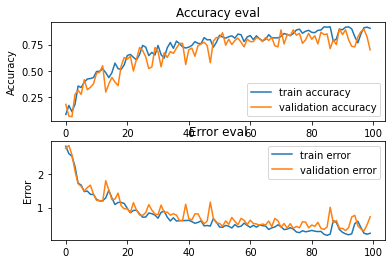

In [13]:
# print(history.params)
# print(model.metrics_names)
print(history.history.keys())
# print(history.history.values())
plot_history(history)

In [14]:
res = model.predict(X_test)

5/5 [==============================] - 1s 7ms/step


In [15]:
indx = 79
print(actions[np.argmax(y_test[indx])])
print(actions[np.argmax(res[indx])])

bari
bari


In [16]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

ypred = res

# converts the predictins from their one hot repr to categorical label
ytrue = np.argmax(y_test, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()
# print(res) 
# _, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [17]:
multilabel_confusion_matrix(ytrue, ypred)

array([[[126,   0],
        [  0,  10]],

       [[116,  11],
        [  3,   6]],

       [[130,   0],
        [  0,   6]],

       [[127,   0],
        [  9,   0]],

       [[121,   9],
        [  2,   4]],

       [[128,   1],
        [  1,   6]],

       [[123,   7],
        [  2,   4]],

       [[125,   5],
        [  0,   6]],

       [[124,   1],
        [ 10,   1]],

       [[122,   1],
        [  0,  13]],

       [[129,   0],
        [  2,   5]],

       [[132,   0],
        [  0,   4]],

       [[126,   2],
        [  2,   6]],

       [[128,   0],
        [  1,   7]],

       [[127,   1],
        [  2,   6]],

       [[129,   0],
        [  3,   4]],

       [[125,   0],
        [  1,  10]]], dtype=int64)

In [37]:
accuracy_score(ytrue, ypred)

0.875

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytrue,ypred)
cm

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  4,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0],
       [ 0,  0,  0,  0,  2,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  5,  0,  4,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  

<AxesSubplot:>

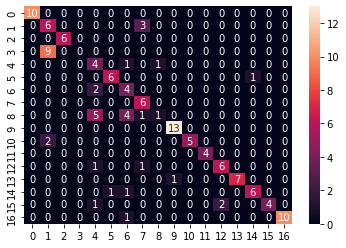

In [20]:
import seaborn as sns
sns.heatmap(cm,annot=True)